In [41]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score  
from sklearn.metrics import recall_score  
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn import neighbors
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

## get the X_date, Y_target

In [2]:
def get_the_predicted_bugs(name, num1, num2):
    All_Data = pd.read_csv(name, usecols = [i for i in range(num1, num2)]).values
    return All_Data

In [3]:
data = get_the_predicted_bugs('modified_all_data.csv', 2, 45)

## GaussianNB

In [4]:
accuracy_score_list = []
recall_score_list = []
for i in range(100):
    data_random = np.random.permutation(data)
    x = data_random[:, [i for i in range(data.shape[1] - 1)]]
    y = data_random[:, -1]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 0)
    gnb_clf = GaussianNB()
    gnb_clf.fit(x_train, y_train)
    
    y_pre = gnb_clf.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test, y_pre))
    recall_score_list.append(recall_score(y_test, y_pre))

In [5]:
np.mean(accuracy_score_list)

0.8320200333889817

In [6]:
np.mean(recall_score_list)

0.400132676676616

By GaussianNB, the average accuracy_score of 100 times is about is about 0.83 and the average recall_score of 100 times is about 0.40.

## Feature selection

## Removing features with low variance

In [7]:
accuracy_score_list = []
recall_score_list = []
for i in range(100):
    data_random = np.random.permutation(data)
    x = data_random[:, [i for i in range(data.shape[1] - 1)]]
    y = data_random[:, -1]
    sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
    x_new = sel.fit_transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.4, random_state = 0)
    gnb_clf = GaussianNB()
    gnb_clf.fit(x_train, y_train)
    
    y_pre = gnb_clf.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test, y_pre))
    recall_score_list.append(recall_score(y_test, y_pre))

In [8]:
np.mean(accuracy_score_list)

0.8309849749582638

In [9]:
np.mean(recall_score_list)

0.34203619934410645

In [10]:
x.shape, x_new.shape

((1497, 42), (1497, 35))

By Removing features with low variance, the average recall_score of 100 times is about 0.34, the result is not good.

## Univariate feature selection

In [12]:
def f(num_of_col, method):
    accuracy_score_list = []
    recall_score_list = []
    for i in range(100):
        data_random = np.random.permutation(data)
        x = data_random[:, [i for i in range(data.shape[1] - 1)]]
        y = data_random[:, -1]
        x_new = SelectKBest(method, k = num_of_col).fit_transform(x, y)
        x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.4, random_state = 0)
        gnb_clf = GaussianNB()
        gnb_clf.fit(x_train, y_train)

        y_pre = gnb_clf.predict(x_test)
        accuracy_score_list.append(accuracy_score(y_test, y_pre))
        recall_score_list.append(recall_score(y_test, y_pre))
    average_accuracy_score = np.mean(accuracy_score_list)
    average_recall_score = np.mean(recall_score_list)
    return [average_accuracy_score, average_recall_score, x, x_new, x.shape, x_new.shape]

## f_classif

In [15]:
f(20, f_classif)

[0.8267946577629384,
 0.40697191833738844,
 array([[  1.,   1.,   0., ...,   1.,  11.,   6.],
        [  1.,   1.,   0., ...,  11., 181., 127.],
        [  1.,   1.,   0., ...,   7.,  18.,   8.],
        ...,
        [  0.,   0.,   0., ...,   3.,   9.,  10.],
        [  0.,   0.,   0., ...,   1.,   6.,   6.],
        [  1.,   1.,   0., ...,   6.,  12.,   9.]]),
 array([[  0.,   0.,   3., ...,   0.,  11.,   6.],
        [  0.,   0.,  28., ...,   2., 181., 127.],
        [  0.,   0.,   2., ...,   0.,  18.,   8.],
        ...,
        [  0.,   0.,   0., ...,   0.,   9.,  10.],
        [  0.,   0.,  10., ...,   0.,   6.,   6.],
        [  0.,   0.,  13., ...,   0.,  12.,   9.]]),
 (1497, 42),
 (1497, 20)]

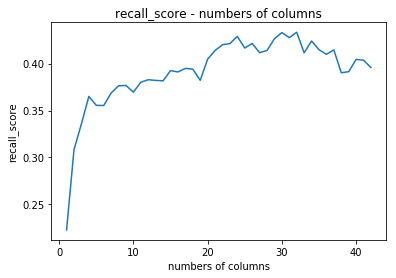

In [17]:
plt.plot([i for i in range(1, 43)], [f(i, f_classif)[1] for i in range(1, 43)])
plt.xlabel('numbers of columns')
plt.ylabel('recall_score')
plt.title('recall_score - numbers of columns')
list_num = [i for i in range(1, 43)]
list_recall_score =  [f(i, f_classif)[1] for i in range(1, 43)]

In [18]:
np.max(list_recall_score), np.argmax(list_recall_score)

(0.43520307688977006, 31)

In [19]:
list_recall_score[31]

0.43520307688977006

By Univariate feature selection and f_classif, we can get the best recall_score when the number of the columns equals to 32.

In [21]:
a = [sum(data[:, i]) for i in range(43)]
len(set(a)) == len(a)

True

In [23]:
modified_x = f(32, f_classif)[3]

In [24]:
index_list = []
for i in range(43):
    for j in range(32):
        if abs(sum(data[:, i]) - sum(modified_x[:, j])) < 1e-2:
            index_list.append(i)
            continue
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 33,
 34,
 36,
 37,
 40,
 41]

In [25]:
len(index_list)

32

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 28,
 29,
 33,
 34,
 36,
 37,
 40,
 41]

In [27]:
f(32, f_classif)[0], f(32, f_classif)[1]

(0.8195826377295493, 0.4303704360659274)

We should choose the following 32 index and can get the best recall_score 0.43 and the accuracy_score 0.82.

## mutual_info_classif

Text(0.5,1,'recall_score - numbers of columns')

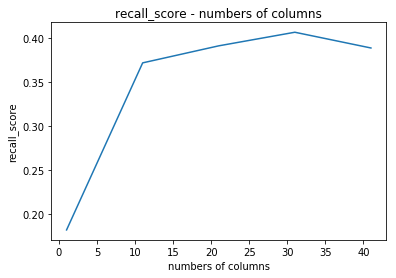

In [29]:
list_num = [i for i in range(1, 43, 10)]
list_recall_score =  [f(i, mutual_info_classif)[1] for i in range(1, 43, 10)]
plt.plot(list_num, list_recall_score)
plt.xlabel('numbers of columns')
plt.ylabel('recall_score')
plt.title('recall_score - numbers of columns')

By Univariate feature selection and mutual_info_classif, it seems much time comsuming and the recall_score is not good enough.

## Feature selection using SelectFromModel

## L1-based feature selection

In [37]:
accuracy_score_list = []
recall_score_list = []
for i in range(100):
    data_random = np.random.permutation(data)
    x = data_random[:, [i for i in range(data.shape[1] - 1)]]
    y = data_random[:, -1]
    lsvc = LinearSVC(C = 0.01, penalty = 'l1', dual = False).fit(x, y)
    model = SelectFromModel(lsvc, prefit = True)
    x_new = model.transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.4, random_state = 0)
    gnb_clf = GaussianNB()
    gnb_clf.fit(x_train, y_train)

    y_pre = gnb_clf.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test, y_pre))
    recall_score_list.append(recall_score(y_test, y_pre))


In [38]:
np.mean(accuracy_score_list), np.mean(recall_score_list)

(0.8302003338898166, 0.32620260115663574)

In [39]:
x.shape, x_new.shape

((1497, 42), (1497, 22))

By Feature selection using SelectFromModel and L1-based feature selection, the average recall_score of 100 times is about 0.326, the result is not good.

## Tree-based feature selection

In [51]:
accuracy_score_list = []
recall_score_list = []
for i in range(100):
    data_random = np.random.permutation(data)
    x = data_random[:, [i for i in range(data.shape[1] - 1)]]
    y = data_random[:, -1]
    clf = ExtraTreesClassifier(n_estimators = 50)
    clf = clf.fit(x, y)
    model = SelectFromModel(clf, prefit = True)
    x_new = model.transform(x)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.4, random_state = 0)
    gnb_clf = GaussianNB()
    gnb_clf.fit(x_train, y_train)
    y_pre = gnb_clf.predict(x_test)
    accuracy_score_list.append(accuracy_score(y_test, y_pre))
    recall_score_list.append(recall_score(y_test, y_pre))

In [52]:
np.mean(accuracy_score_list), np.mean(recall_score_list)

(0.8336894824707848, 0.37570245356711984)

In [53]:
x.shape, x_new.shape

((1497, 42), (1497, 23))

By Feature selection using SelectFromModel and Tree-based feature selection, the average recall_score of 100 times is about 0.376, the result is not good.

## Conclusion

Up to now, the best recall_score we can get is about 0.43. When we get the best recall_score, and the accuracy_score is about 0.82.

When we get the best recall_score, we ues the naive_bayes, GaussianNB and we take the following index of the columns as our actual input.

[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 28, 29, 33, 34, 36, 37, 40, 41]